# CSCI 360 Project 4: Machine Learning
## Date Due: 11:59 PM 4/30/2021

###### Name: 
###### Student ID: 

Welcome to Google Colab and the Anaconda distribution. In this project, you will work with different datasets and technologies to simulate the data science pipeline and help teach machine learning algorithms. The project is broken into 4 distinct parts, each which do not overlap and do not require previous parts to be done. The first part focuses on the K-nearest neighbors algorithm, which is built completely from numpy alone: this algorithm is run on the iris dataset from UCI's ML repository. The second part focuses on ensembles as a way to learn practical applications of concepts learned in class such as Linear Perceptrons, Neural Networks, Decision Trees, and other machine learning algorithms. You will build 3 different ensembles using the SKlearn package, run against the breast cancer dataset from UCI's ML repository. The third part focuses on Convolutional Neural Networks built from Pytorch: you will build a nn.Sequential model run against the Cifar-10 dataset for image classification. This portion briefly touches on the concepts of neural networks and showcases recent technologies directed towards the intersection of Computer Vision and Machine Learning. The fourth part focuses on Recurrent Neural Networks again built from Pytorch. This time, you will build the neural network through a nn.Module class and run it against the AG News dataset for text classification. This part exemplifies on neural networks and natural language processing.

You may notice that we are running everything via Google Colab. Why not download and run everything on Anaconda distribution and do the project locally? The problem with doing so is that your graphics card may not be as good for parts 3 and 4. With Google Colab, we can set the runtime environment (using the Runtime -> Change Runtime Type setting above) which will significantly increase the speed of training our machine learning models. Set the runtime to GPU in order to fully utilize Google Colab. We use Google's Tesla K80 GPU, which is significantly more powerful than your integrated graphics cards on your laptops or desktops. Google Colab also already comes with all packages involved in this project, including Pytorch and Sklearn, saving the headache that is installation of Anaconda and the packages involved.

### Initial setup

These few codeblocks are here to simply important necessary packages for the entire project. Numpy and Matplotlib are staples of the data science pipeline.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Below is the importing of the iris dataset. Make sure the google drive and folder is set properly in order to make sure the project works on your Google Colab setup and you can pull the dataset properly. Do copy and paste the authorization code to give access of your Google Drive to Google Colab. 

The Iris dataset is a toy dataset with 150 data points, each with 4 features and a class. The data is holds the following features:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa (0.0), Iris Versicolour (1.0), Iris Virginica (2.0)

In [ ]:
try:
    from google.colab import drive
    drive.mount("/content/drive")
    iris = np.genfromtxt("/content/drive/My Drive/CSCI360_Project4/datasets/iris-dataset/iris.data", delimiter=",", dtype=None)
except:
    iris = np.genfromtxt("./datasets/iris-dataset/iris.data", delimiter=",", dtype=None)
X = iris[:,0:-1] #features are the other columns
Y = iris[:,-1] #target value (iris specimen) is last column
print(X.shape)
print(Y.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(150, 4)
(150,)


Generally it is better to do a train, validation, and test dataset. Evaluation generally increases that way. However, for the purposes of this particular question, we only split the data into a training and testing set that isn't randomized.

Also shown below are a couple of plots showing the relations between the first and second features based on class. 

(38, 4)
(112, 4)
(38,)
(112,)


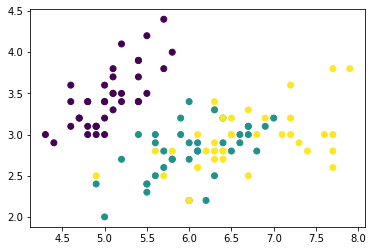

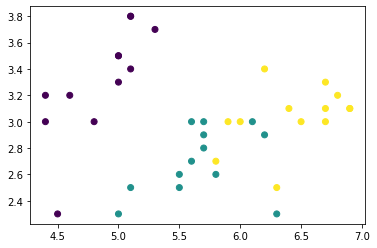

In [ ]:
def split_data(features, targets):
  x_dim, y_dim = np.atleast_2d(features).shape
  splitting_point = int(round(0.75 * x_dim)) #75% of the data
  X_train, X_test = features[:splitting_point,:],features[splitting_point:,:]
  Y = np.asarray(targets).flatten()
  Y_train, Y_test = Y[:splitting_point],Y[splitting_point:]
  return X_train, Y_train, X_test, Y_test

#Normally, good practice is to randomize and crossvalidate the data, but for grading purposes, don't do it.
np.random.seed(0) #do not change this line
X_train, Y_train, X_test, Y_test = split_data(X, Y)
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)
plt.scatter(x=X_train[:,0:1], y=X_train[:,1:2], c=Y_train.reshape(X_train[:,0:1].shape))
plt.show()
plt.scatter(x=X_test[:,0:1], y=X_test[:,1:2], c=Y_test.reshape(X_test[:,0:1].shape))
plt.show()

## Question 1) k-Nearest Neighbors - 5 Points

In this section, you will create a key portion to a kNN classifier, the prediction function from scratch without using sklearn or other packages besides numpy. Do **NOT** import additional packages.

After the initial blocks, the data preprocessing is done. The basic layout of the kNN class is done below; the only thing to figure out is the prediction function. The prediction function should follow a general algorithm:

```
For each datapoint in the test data:
    Calculate the distance between training and testing data using self.distance
    Sort the distances by the K nearest neighbors (self.K, the given parameter)
    Calculate the class per datapoint through the neighbors found
Return a set of predicted classes per datapoint in the test data
```

In [ ]:
class kNN_classifier:
    def __init__(self, X, Y, K=1):
        self.train(X, Y, K)

    def train(self, X, Y, K=1):
        self.X = np.asarray(X)
        self.Y = np.asarray(Y)
        self.K = K
        self.classes = np.unique(Y)

    def predict(self, Xtest):
        '''Implement this function'''
        y_pred = []
        for x in Xtest:
          distance_list = self.distance(x, X_train)
          distance_index = distance_list.argsort()
          k_distance = distance_index[:self.K]
          y_train = np.asarray(Y_train)
          k_class = Y_train[k_distance]
          values, counts = np.unique(k_class, return_counts=True)
          x_class = values[np.argmax(counts)]
          y_pred.append(x_class)
        return y_pred
        #pass

    def evaluate(self, Ypred, Ytest):
        accuracy = 0
        for predicted, true_val in zip(Ypred, Ytest):
            if predicted == true_val:
                accuracy += 1
        return accuracy / Ytest.shape[0]
  
    def distance(self, X, Y):
        return np.sqrt(np.sum((X-Y)**2, axis=1))

Evaluation function below copied, as we will use this later on separately in both parts 1 and 2

In [ ]:
def evaluate(Ypred, Ytest):
    accuracy = 0
    for predicted, true_val in zip(Ypred, Ytest):
        if predicted == true_val:
            accuracy += 1
    return accuracy / Ytest.shape[0]

Run some general test cases with your kNN classifier below. You can compare your results to the SKlearn implementation of kNN (which does not have to be exact, but needs to be relatively close). Since the dataset is small, the kNN results should slowly become worse and worse on this particular dataset with more neighbors. Optimally, you do something called parameter tuning by finding a parameter with decent training and validation accuracy that gets the best possible testing accuracy every time. Therefore you want to avoid overfitting or underfitting to the data (e.g. K=1 is probably overfitting, and K=50 is probably underfitting).

In [ ]:
kNN = kNN_classifier(X_train, Y_train, 1)
pred = kNN.predict(X_test)
eval_results = kNN.evaluate(pred, Y_test)
print(eval_results)
assert eval_results == 1.0

kNN = kNN_classifier(X_train, Y_train, 5)
pred = kNN.predict(X_test)
eval_results = kNN.evaluate(pred, Y_test)
print(eval_results)
assert eval_results >= 0.97

kNN = kNN_classifier(X_train, Y_train, 10)
pred = kNN.predict(X_test)
eval_results = kNN.evaluate(pred, Y_test)
print(eval_results)
assert eval_results >= 0.90

kNN = kNN_classifier(X_train, Y_train, 35)
pred = kNN.predict(X_test)
eval_results = kNN.evaluate(pred, Y_test)
print(eval_results)
assert eval_results >= 0.85

kNN = kNN_classifier(X_train, Y_train, 50)
pred = kNN.predict(X_test)
eval_results = kNN.evaluate(pred, Y_test)
print(eval_results)
assert eval_results >= 0.5

1.0
1.0
0.9736842105263158
0.9736842105263158
0.868421052631579


Compare your results to the K-nearest neighbors implementation from the sklearn package. The results do not need to be exact, but it can be a decent starting point.

By the way, a side note about sklearn: you can find documentation here (more importantly used in part 2). https://scikit-learn.org/stable/user_guide.html

In [ ]:
from sklearn import neighbors

skkNN = neighbors.KNeighborsClassifier(n_neighbors=1)
skkNN_fit = skkNN.fit(X_train, Y_train)
skkNN_pred = skkNN.predict(X_test)
eval_results = evaluate(skkNN_pred, Y_test)
print(eval_results)

skkNN = neighbors.KNeighborsClassifier(n_neighbors=5)
skkNN_fit = skkNN.fit(X_train, Y_train)
skkNN_pred = skkNN.predict(X_test)
eval_results = evaluate(skkNN_pred, Y_test)
print(eval_results)

skkNN = neighbors.KNeighborsClassifier(n_neighbors=10)
skkNN_fit = skkNN.fit(X_train, Y_train)
skkNN_pred = skkNN.predict(X_test)
eval_results = evaluate(skkNN_pred, Y_test)
print(eval_results)

skkNN = neighbors.KNeighborsClassifier(n_neighbors=35)
skkNN_fit = skkNN.fit(X_train, Y_train)
skkNN_pred = skkNN.predict(X_test)
eval_results = evaluate(skkNN_pred, Y_test)
print(eval_results)

skkNN = neighbors.KNeighborsClassifier(n_neighbors=50)
skkNN_fit = skkNN.fit(X_train, Y_train)
skkNN_pred = skkNN.predict(X_test)
eval_results = evaluate(skkNN_pred, Y_test)
print(eval_results)

1.0
1.0
0.9736842105263158
0.9736842105263158
0.868421052631579


## Question 2) Ensemble Learning - 6 Points

In this section, you will create 3 different ensembles to simulate ensemble learning. The topic at hand is a bit different from what you have learned within lecture, but is a good way to practice and see the concepts learned within lecture in a "grab-bag" format: you have learned different concepts such as linear perceptrons, naive bayes, and neural networks, now you can put these to use through sklearn's packages without having to manually build them up from scratch. You can then pull different implementations, parameters, and classifiers to run against the breast cancer dataset.

The concept of an ensemble in machine learning is to take multiple machine learning algorithms and combine them to make a stronger model together. For example, a linear perceptron is not strong enough alone on a dataset, only leading to mediocre accuracy. However, combining the linear perceptron with a decision tree will make the accuracy significantly better. That is the power of an ensemble classifier, and in essence this part (and this project) is an ensemble of different methods used in Machine Learning.

Below is again another data preprocessing block. This time there are 9 features and significantly more data. 

0. (Ignore the very first feature, as this is just id numbers)
1. Clump Thickness: 1 - 10
2. Uniformity of Cell Size: 1 - 10
3. Uniformity of Cell Shape: 1 - 10
4. Marginal Adhesion: 1 - 10
5. Single Epithelial Cell Size: 1 - 10
6. Bare Nuclei: 1 - 10
7. Bland Chromatin: 1 - 10
8. Normal Nucleoli: 1 - 10
9. Mitoses: 1 - 10
10. Class: (2.0 for benign, 4.0 for malignant)

In [ ]:
try:
    from google.colab import drive
    drive.mount("/content/drive")
    breast_cancer = np.genfromtxt("/content/drive/My Drive/CSCI360_Project4/datasets/breast-cancer-dataset/breast-cancer-wisconsin.data", delimiter=",", dtype=np.float64)
except:
    breast_cancer = np.genfromtxt("./datasets/breast-cancer-dataset/breast-cancer-wisconsin.data", delimiter=",", dtype=np.float64)
X = breast_cancer[:,1:-1] #features are the other columns
Y = breast_cancer[:,-1] #target value (iris specimen) is last column
X = np.nan_to_num(X)
Y = np.nan_to_num(Y)
print(X.shape)
print(Y.shape)

np.random.seed(0)
np.random.shuffle(X)
X_train, Y_train, X_test, Y_test = split_data(X, Y)
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(699, 9)
(699,)
(175, 9)
(524, 9)
(175,)
(524,)


Evaluation function below copied, as we will use this later on separately in both parts 1 and 2

In [ ]:
def evaluate(Ypred, Ytest):
    accuracy = 0
    for predicted, true_val in zip(Ypred, Ytest):
        if predicted == true_val:
            accuracy += 1
    return accuracy / Ytest.shape[0]

Below are some samples and showing of how an ensemble classifier can increase performance. A standard kNN classifier from the sklearn package cannot break 60% accuracy, but with an ensemble combined with a decision tree, the classifier can break 60% accuracy. Feel free to use the simple ensemble as an example of what you should implement for the 3 ensembles.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

skkNN = KNeighborsClassifier(n_neighbors=5)
skkNN_fit = skkNN.fit(X_train, Y_train)
skkNN_pred = skkNN.predict(X_test)
eval_results = evaluate(skkNN_pred, Y_test)
print(eval_results)

simpleEnsemble = VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=5)), ('dt', DecisionTreeClassifier(max_depth=5))], voting='soft', weights=[1, 1])
simpleEnsemble_fit = simpleEnsemble.fit(X_train, Y_train)
simpleEnsemble_pred = simpleEnsemble.predict(X_test)
eval_results = evaluate(simpleEnsemble_pred, Y_test)
print(eval_results)

0.5942857142857143
0.6171428571428571


Use some creativity to create 3 different ensembles to break 62% accuracy. Each ensemble classifier should utilize different classifiers from sklearn and/or parameters. The limiting factor here is that you may only use sklearn modules. Using other modules may crash the autograder, hence only use sklearn modules here.

By the way, a side note about sklearn: you can find documentation here. https://scikit-learn.org/stable/user_guide.html

This is where you can read through the documentation of important pieces of the code and look through tutorials on how to build ensembles with sklearn.

In [ ]:
import sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
'''Import all necessary sklearn packages- only use sklearn modules.'''

def ensemble_ver_A():
    '''Implement this function'''
    return VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)), ('rf', RandomForestClassifier(n_estimators=50, random_state=1)), ('gnb', GaussianNB())], voting='hard')
    #pass

def ensemble_ver_B():
    '''Implement this function'''
    return VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)), ('dt', DecisionTreeClassifier(max_depth=5)), ('gnb', GaussianNB())], voting='soft')
    #pass

def ensemble_ver_C():
    '''Implement this function'''
    return VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=5)), ('dt', DecisionTreeClassifier(max_depth=5)), ('gnb', GaussianNB())], voting='soft')
    #pass

Test the results of each ensemble you built below.

In [ ]:
ensemble_A = ensemble_ver_A()
ensemble_A_fit = ensemble_A.fit(X_train, Y_train)
ensemble_A_pred = ensemble_A.predict(X_test)
eval_results = evaluate(ensemble_A_pred, Y_test)
print(eval_results)
assert eval_results >= 0.62

ensemble_B = ensemble_ver_B()
ensemble_B_fit = ensemble_B.fit(X_train, Y_train)
ensemble_B_pred = ensemble_B.predict(X_test)
eval_results = evaluate(ensemble_B_pred, Y_test)
print(eval_results)
assert eval_results >= 0.62

ensemble_C = ensemble_ver_C()
ensemble_C_fit = ensemble_C.fit(X_train, Y_train)
ensemble_C_pred = ensemble_C.predict(X_test)
eval_results = evaluate(ensemble_C_pred, Y_test)
print(eval_results)
assert eval_results >= 0.62

0.7657142857142857
0.7314285714285714
0.7028571428571428


### Pytorch and CIFAR-10 setup

Two cutting edge areas of machine learning include computer vision and natural language processing. Computer vision is the task of having computers understand and analyze image or video data (in an intelligent way, using artificial intelligence). A key task of computer vision is image classification, which we will focus on here. We will take a dataset full of images and classify them into categories, similar to how a human would split images based on what the person sees.

Pytorch is one of two deep learning frameworks that are used in industry and academia consistently (the other being Tensorflow with Keras). We use this framework for neural networks and deep learning in order to have our code run on GPUs with much faster training. When using a framework like PyTorch or TensorFlow, you can harness the power of the GPU for your own custom neural network architectures without having to write CUDA code directly (which is beyond the scope of this class). We want you to be ready to use one of these frameworks for your project so you can experiment more efficiently than if you were writing every feature you want to use by hand. We want you to be exposed to the sort of deep learning code you might run into in academia or industry. Pytorch simplifies the process of creating the neural networks.

Pytorch documentation can be found here: https://pytorch.org/docs/stable/index.html

This is where you can read through the documentation of important pieces of the code and look through tutorials on how to build different network architectures for different tasks.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

Cifar-10 is a dataset that is used for image classification. More details can be found here: https://www.cs.toronto.edu/~kriz/cifar.html

The basic idea is that this dataset has 10 different classes, with 60000 32 by 32 images. 50000 of these are used as training (with 1000 as validation out of that 50000), and 10000 of these are used as testing. 

The classes are:

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog 
6. frog 
7. horse 
8. ship
9. truck

In [2]:
class ChunkSampler(sampler.Sampler):
    """Samples elements sequentially from some offset. 
    Arguments:
        num_samples: # of desired datapoints
        start: offset where we should start selecting from
    """
    def __init__(self, num_samples, start = 0):
        self.num_samples = num_samples
        self.start = start

    def __iter__(self):
        return iter(range(self.start, self.start + self.num_samples))

    def __len__(self):
        return self.num_samples

NUM_TRAIN = 49000
NUM_VAL = 1000

try:
    cifar10_train = dset.CIFAR10('/content/drive/My Drive/CSCI360_Project4/datasets/cifar-10', train=True, download=True,
                            transform=T.ToTensor())
    loader_train = DataLoader(cifar10_train, batch_size=64, sampler=ChunkSampler(NUM_TRAIN, 0))

    cifar10_val = dset.CIFAR10('/content/drive/My Drive/CSCI360_Project4/datasets/cifar-10', train=True, download=True,
                            transform=T.ToTensor())
    loader_val = DataLoader(cifar10_val, batch_size=64, sampler=ChunkSampler(NUM_VAL, NUM_TRAIN))

    cifar10_test = dset.CIFAR10('/content/drive/My Drive/CSCI360_Project4/datasets/cifar-10', train=False, download=True,
                            transform=T.ToTensor())
    loader_test = DataLoader(cifar10_test, batch_size=64)
except:
    cifar10_train = dset.CIFAR10('./datasets/cifar-10', train=True, download=True,
                            transform=T.ToTensor())
    loader_train = DataLoader(cifar10_train, batch_size=64, sampler=ChunkSampler(NUM_TRAIN, 0))

    cifar10_val = dset.CIFAR10('./datasets/cifar-10', train=True, download=True,
                            transform=T.ToTensor())
    loader_val = DataLoader(cifar10_val, batch_size=64, sampler=ChunkSampler(NUM_VAL, NUM_TRAIN))

    cifar10_test = dset.CIFAR10('./datasets/cifar-10', train=False, download=True,
                            transform=T.ToTensor())
    loader_test = DataLoader(cifar10_test, batch_size=64)


Extracting /content/drive/My Drive/CSCI360_Project4/datasets/cifar-10/cifar-10-python.tar.gz to /content/drive/My Drive/CSCI360_Project4/datasets/cifar-10
Files already downloaded and verified
Files already downloaded and verified


## Question 3) Convolutional Neural Network - 5 Points

Let's start by looking at a simple model. First, note that PyTorch operates on Tensors, which are n-dimensional arrays functionally analogous to numpy's ndarrays, with the additional feature that they can be used for computations on GPUs.
We'll provide you with a Flatten function, which we explain here. Remember that our image data (and more relevantly, our intermediate feature maps) are initially N x C x H x W, where:

0. N is the number of datapoints
1. C is the number of channels
2. H is the height of the intermediate feature map in pixels
3. W is the height of the intermediate feature map in pixels

This is the right way to represent the data when we are doing something like a 2D convolution, that
needs spatial understanding of where the intermediate features are relative to each other. When we input data into fully connected affine layers, however, we want each datapoint to be represented by a single vector -- it's no longer useful to segregate the different channels, rows, and columns of the data. So, we use a "Flatten" operation to collapse the C x H x W values per representation into a single long vector. The Flatten function below first reads in the N, C, H, and W values from a given batch of data, and then returns a "view" of that data. "View" is analogous to numpy's "reshape" method: it reshapes x's dimensions to be N x ??, where ?? is allowed to be anything (in this case, it will be C x H x W, but we don't need to specify that explicitly).

The first step to training your own model is defining its architecture.

Here's an example of a convolutional neural network defined in PyTorch -- try to understand what each line is doing, 
remembering that each layer is composed upon the previous layer. We haven't trained anything yet - that'll come next- for now, we want you to understand how everything gets set up. nn.Sequential is a container which applies each layer 
one after the other. 

In that example, you see 2D convolutional layers (Conv2d), ReLU activations, and fully-connected
layers (Linear).

In [36]:
# Verify that CUDA is properly configured and you have a GPU available
torch.cuda.is_available()

import copy
dtype = torch.cuda.FloatTensor

# This is a little utility that we'll use to reset the model
# if we want to re-initialize all our parameters
def reset(m):
    if hasattr(m, 'reset_parameters'):
        m.reset_parameters()

class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

# Here's where we define the architecture of the model... 
simple_model = nn.Sequential(
                nn.Conv2d(3, 32, kernel_size=7, stride=2),
                nn.ReLU(inplace=True),
                Flatten(), # see above for explanation
                nn.Linear(5408, 10), # affine layer
              )

# Set the type of all data in this model to be FloatTensor 
simple_model.type(dtype)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2))
  (1): ReLU(inplace=True)
  (2): Flatten()
  (3): Linear(in_features=5408, out_features=10, bias=True)
)

To make sure you're doing the right thing, use the following tool to check the dimensionality of your
output (it should be 64 x 10, since our batches have size 64 and the output of the final affine layer should be 10, 
corresponding to our 10 classes):

In [37]:
## Now we're going to feed a random batch into the model you defined and make sure the output is the right size
x = torch.randn(64, 3, 32, 32).type(dtype)
x_var = Variable(x.type(dtype)) # Construct a PyTorch Variable out of your input data
ans = simple_model(x_var)        # Feed it through the model! 

# Check to make sure what comes out of your model
# is the right dimensionality... this should be True
# if you've done everything correctly
np.array_equal(np.array(ans.size()), np.array([64, 10]))       

True

PyTorch supports many other layer types, loss functions, and optimizers - below we initialize an RMSProp optimizer and calculate the loss with cross entropy loss.

In [38]:
fixed_model_gpu = copy.deepcopy(simple_model).type(dtype)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(fixed_model_gpu.parameters(), lr=1e-3) # lr sets the learning rate of the optimizer

x_gpu = torch.randn(64, 3, 32, 32).type(dtype)
x_var_gpu = Variable(x.type(dtype)) # Construct a PyTorch Variable out of your input data
ans = fixed_model_gpu(x_var_gpu)        # Feed it through the model! 

# Check to make sure what comes out of your model
# is the right dimensionality... this should be True
# if you've done everything correctly
np.array_equal(np.array(ans.size()), np.array([64, 10]))

ans = simple_model(x_var)

torch.cuda.synchronize() # Make sure there are no pending GPU computations
ans = fixed_model_gpu(x_var_gpu)        # Feed it through the model! 
torch.cuda.synchronize() # Make sure there are no pending GPU computations

Now that you've seen how to define a model, let's walk through how you'd actually train one whole epoch 
over your training data (using the simple_model we provided above).

In [39]:
# This sets the model in "training" mode. This is relevant for some layers that may have different behavior
# in training mode vs testing mode, such as Dropout and BatchNorm. 
fixed_model_gpu.train()

# Load one batch at a time.
for t, (x, y) in enumerate(loader_train):
    x_var = Variable(x.type(dtype))
    y_var = Variable(y.type(dtype).long())

    # This is the forward pass: predict the scores for each class, for each x in the batch.
    scores = fixed_model_gpu(x_var)
    
    # Use the correct y values and the predicted y values to compute the loss.
    loss = loss_fn(scores, y_var)
    
    if (t + 1) % 100 == 0:
        print('t = %d, loss = %.4f' % (t + 1, loss.item()))#loss.data[0]))

    # Zero out all of the gradients for the variables which the optimizer will update.
    optimizer.zero_grad()
    
    # This is the backwards pass: compute the gradient of the loss with respect to each 
    # parameter of the model.
    loss.backward()
    
    # Actually update the parameters of the model using the gradients computed by the backwards pass.
    optimizer.step()

t = 100, loss = 1.9927
t = 200, loss = 1.8928
t = 300, loss = 1.7681
t = 400, loss = 1.5998
t = 500, loss = 1.5918
t = 600, loss = 1.6947
t = 700, loss = 1.5939


Now you've seen how the training process works in PyTorch. To save you writing boilerplate code,
we're providing the following helper functions to help you train for multiple epochs and check the
accuracy of your model:

In [41]:
def train(model, loss_fn, optimizer, num_epochs = 1):
    for epoch in range(num_epochs):
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))
        model.train()
        for t, (x, y) in enumerate(loader_train):
            x_var = Variable(x.type(dtype))
            y_var = Variable(y.type(dtype).long())

            scores = model(x_var)
            
            loss = loss_fn(scores, y_var)
            if (t + 1) % 100 == 0:
                print('t = %d, loss = %.4f' % (t + 1, loss.item()))#loss.data[0]))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

def check_accuracy(model, loader):
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    for x, y in loader:
        x_var = Variable(x.type(dtype), volatile=True)

        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)
        num_correct += (preds == y).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
    return acc

Let's see the train and check_accuracy code in action -- feel free to use these methods when
evaluating the models you develop below.

You should get a training loss of around 1.2-1.4, and a validation accuracy of around 50-60%. As
mentioned above, if you re-run the cells, you'll be training more epochs, so your performance will
improve past these numbers.

But don't worry about getting these numbers better -- this was just practice before you tackle
designing your own model.

In [42]:
torch.cuda.random.manual_seed(12345)
fixed_model_gpu.apply(reset)
train(fixed_model_gpu, loss_fn, optimizer, num_epochs=3)
check_accuracy(fixed_model_gpu, loader_val)

Starting epoch 1 / 3
t = 100, loss = 1.9786
t = 200, loss = 1.8440
t = 300, loss = 1.7127
t = 400, loss = 1.5325
t = 500, loss = 1.5331
t = 600, loss = 1.6459
t = 700, loss = 1.5777
Starting epoch 2 / 3
t = 100, loss = 1.2691
t = 200, loss = 1.4751
t = 300, loss = 1.4052
t = 400, loss = 1.3239
t = 500, loss = 1.3121
t = 600, loss = 1.5220
t = 700, loss = 1.4696
Starting epoch 3 / 3
t = 100, loss = 1.1038
t = 200, loss = 1.3281
t = 300, loss = 1.2653
t = 400, loss = 1.2142
t = 500, loss = 1.2301
t = 600, loss = 1.4734
t = 700, loss = 1.3827
Checking accuracy on validation set
Got 570 / 1000 correct (57.00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


0.57

## Train a _great_ model on CIFAR-10!

Now it's your job to experiment with architectures, hyperparameters, loss functions, and optimizers to train a model that achieves **>=65%** accuracy on the CIFAR-10 **validation** set. You can use the check_accuracy and train functions from above.

### Things you should try:
- **Filter size**: Above we used 7x7; this makes pretty pictures but smaller filters may be more efficient
- **Number of filters**: Above we used 32 filters. Do more or fewer do better?
- **Pooling vs Strided Convolution**: Do you use max pooling or just stride convolutions?
- **Batch normalization**: Try adding spatial batch normalization after convolution layers and vanilla batch normalization after affine layers. Do your networks train faster?
- **Network architecture**: The network above has two layers of trainable parameters. Can you do better with a deep network? Good architectures to try include:
    - [conv-relu-pool]xN -> [affine]xM -> [softmax or SVM]
    - [conv-relu-conv-relu-pool]xN -> [affine]xM -> [softmax or SVM]
    - [batchnorm-relu-conv]xN -> [affine]xM -> [softmax or SVM]
- **Global Average Pooling**: Instead of flattening and then having multiple affine layers, perform convolutions until your image gets small (7x7 or so) and then perform an average pooling operation to get to a 1x1 image picture (1, 1 , Filter#), which is then reshaped into a (Filter#) vector. This is used in [Google's Inception Network](https://arxiv.org/abs/1512.00567) (See Table 1 for their architecture).
- **Regularization**: Add l2 weight regularization, or perhaps use Dropout.

### Tips for training
For each network architecture that you try, you should tune the learning rate and regularization strength. When doing this there are a couple important things to keep in mind:

- If the parameters are working well, you should see improvement within a few hundred iterations
- Remember the coarse-to-fine approach for hyperparameter tuning: start by testing a large range of hyperparameters for just a few training iterations to find the combinations of parameters that are working at all.
- Once you have found some sets of parameters that seem to work, search more finely around these parameters. You may need to train for more epochs.
- You should use the validation set for hyperparameter search, and save your test set for evaluating your architecture on the best parameters as selected by the validation set.

### Going above and beyond
If you are feeling adventurous there are many other features you can implement to try and improve your performance. You are **not required** to implement any of these; however they would be good things to try.

- Alternative update steps: For the assignment we implemented SGD+momentum, RMSprop, and Adam; you could try alternatives like AdaGrad or AdaDelta.
- Alternative activation functions such as leaky ReLU, parametric ReLU, ELU, or MaxOut.
- Model ensembles
- Data augmentation
- New Architectures
  - [ResNets](https://arxiv.org/abs/1512.03385) where the input from the previous layer is added to the output.
  - [DenseNets](https://arxiv.org/abs/1608.06993) where inputs into previous layers are concatenated together.
  - [This blog has an in-depth overview](https://chatbotslife.com/resnets-highwaynets-and-densenets-oh-my-9bb15918ee32)

### What we expect
At the very least, you should be able to train a ConvNet that gets at least 65% accuracy on the validation set. This is just a lower bound - if you are careful it should be possible to get accuracies much higher than that! 

You should use the space below to experiment and train your network. 

Have fun and happy training!

In [114]:
# Train your model here, and make sure the output of this cell is the accuracy of your best model on the 
# train, val, and test sets. Here's some code to get you started. The output of this cell should be the training
# and validation accuracy on your best model (measured by validation accuracy).

'''Fill in the model below'''
model = nn.Sequential(
                nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
                nn.ReLU(inplace=True),
                nn.BatchNorm2d(32),
                nn.Dropout(p=0.2),
                nn.MaxPool2d(2, stride=2),

                nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                nn.ReLU(inplace=True),
                nn.BatchNorm2d(64),
                nn.Dropout(p=0.2),
                nn.MaxPool2d(2, stride=2),
           

                nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
                nn.ReLU(inplace=True),
                nn.BatchNorm2d(128),
                nn.Dropout(p=0.2),
                nn.MaxPool2d(2, stride=2),

                nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
                nn.ReLU(inplace=True),
                nn.BatchNorm2d(256),
                nn.Dropout(p=0.2),
                nn.MaxPool2d(2, stride=2),

                Flatten(), # see above for explanation
                #nn.Linear(256, 10) # affine layer
            )
######

gpu = copy.deepcopy(model).type(dtype)

loss_fn = nn.CrossEntropyLoss()
#lrates = [1e-2, 3e-2, 5e-2, 7e-2, 1e-3, 3e-3, 5e-3, 7e-3, 1e-4, 3e-4, 5e-4, 7e-4, 1e-5, 3e-5, 5e-5, 7e-5]
#for i in lrates:
#  optimizer = optim.Adam(gpu.parameters(), lr=i)

#  torch.cuda.random.manual_seed(12345)
#  gpu.apply(reset)
#  train(gpu, loss_fn, optimizer, num_epochs=10)
#  check_accuracy(gpu, loader_val)

optimizer = optim.Adam(gpu.parameters(), lr=1e-4)

torch.cuda.random.manual_seed(12345)
gpu.apply(reset)
train(gpu, loss_fn, optimizer, num_epochs=50)
train_acc = check_accuracy(gpu, loader_val)

Starting epoch 1 / 50
t = 100, loss = 5.4414
t = 200, loss = 5.3006
t = 300, loss = 4.9143
t = 400, loss = 4.7722
t = 500, loss = 4.0870
t = 600, loss = 4.5185
t = 700, loss = 4.6564
Starting epoch 2 / 50
t = 100, loss = 3.8737
t = 200, loss = 4.2109
t = 300, loss = 4.1916
t = 400, loss = 3.8775
t = 500, loss = 3.6183
t = 600, loss = 4.2588
t = 700, loss = 4.0268
Starting epoch 3 / 50
t = 100, loss = 3.5033
t = 200, loss = 3.6379
t = 300, loss = 3.8184
t = 400, loss = 3.0603
t = 500, loss = 3.1436
t = 600, loss = 3.6240
t = 700, loss = 3.4568
Starting epoch 4 / 50
t = 100, loss = 3.1686
t = 200, loss = 3.7713
t = 300, loss = 3.4853
t = 400, loss = 2.6246
t = 500, loss = 2.8824
t = 600, loss = 3.1121
t = 700, loss = 3.1452
Starting epoch 5 / 50
t = 100, loss = 2.5325
t = 200, loss = 3.3244
t = 300, loss = 2.7966
t = 400, loss = 2.5842
t = 500, loss = 2.6405
t = 600, loss = 2.6663
t = 700, loss = 2.8438
Starting epoch 6 / 50
t = 100, loss = 2.5980
t = 200, loss = 2.6340
t = 300, loss = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Now that we've gotten a result we're happy with, we test our final model on the test set (which you should store in best_model).  This would be the score we would achieve on a competition. Think about how this compares to your validation set accuracy.

In [115]:
best_model = gpu
test_acc = check_accuracy(best_model, loader_test)
assert test_acc >= 0.65

Checking accuracy on test set


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Got 7167 / 10000 correct (71.67)


### Pytorch and AG News Dataset setup

See Part 3 for explanation on Pytorch. We will use the torchtext portion to take a deeper look into applying neural networks to natural language processing tasks (focusing on text classification). Natural language processing is the task of analyzing and understanding documents and text through a computer, again using artificial intelligence. Similar to computer vision, we do text classification against a dataset to categorize documents into specific classes.

AG is a collection of more than 1 million news articles. News articles have been gathered from more than 2000 news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004. The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc), information retrieval (ranking, search, etc), xml, data compression, data streaming, and any other non-commercial activity.

The AG's news topic classification dataset is constructed by choosing 4 largest classes from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600.

The classes are as follows:

0. World
1. Sports
2. Business
3. Sci/Tech

In [116]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torch.utils.data.dataset import random_split

try:
    import torchtext.datasets as dset
    from torchtext.data.utils import get_tokenizer
    from collections import Counter
    from torchtext.vocab import Vocab
except:
    import sys
    sys.path.append("./torchtext")
    import torchtext.datasets as dset
    from torchtext.data.utils import get_tokenizer
    from collections import Counter
    from torchtext.vocab import Vocab

In [117]:
def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(torch.device('cuda')), text_list.to(torch.device('cuda')), offsets.to(torch.device('cuda'))

try:
    ag_train, ag_test = dset.AG_NEWS('/content/drive/My Drive/CSCI 360 Spring 2021/datasets/AG_news')
    train_dataset = list(ag_train)
    test_dataset = list(ag_test)
    num_train = int(len(train_dataset) * 0.95)
    split_train, split_valid = random_split(train_dataset, [num_train, len(train_dataset) - num_train])
    dataloader_train = DataLoader(split_train, batch_size=64, shuffle=True, collate_fn=collate_batch)
    dataloader_valid = DataLoader(split_valid, batch_size=64, shuffle=True, collate_fn=collate_batch)
    dataloader_test = DataLoader(test_dataset, batch_size=64, shuffle=False, collate_fn=collate_batch)
    
except:
    ag_train, ag_test = dset.AG_NEWS('./datasets/AG_news')
    train_dataset = list(ag_train)
    test_dataset = list(ag_test)
    num_train = int(len(train_dataset) * 0.95)
    split_train, split_valid = random_split(train_dataset, [num_train, len(train_dataset) - num_train])
    dataloader_train = DataLoader(split_train, batch_size=64, shuffle=True, collate_fn=collate_batch)
    dataloader_valid = DataLoader(split_valid, batch_size=64, shuffle=True, collate_fn=collate_batch)
    dataloader_test = DataLoader(test_dataset, batch_size=64, shuffle=False, collate_fn=collate_batch)

train.csv: 29.5MB [00:00, 99.8MB/s]
test.csv: 1.86MB [00:00, 50.5MB/s]                  


## Question 4) Recurrent Neural Network - 5 Points

Here is an example for typical NLP data processing with tokenizer and vocabulary. The first step is to build a vocabulary with the raw training dataset. Users can have a customized vocab by setting up arguments in the constructor of the Vocab class. The text pipeline converts a text string into a list of integers based on the lookup table defined in the vocabulary. 
The label pipeline converts the label into integers.

In [119]:
# Verify that CUDA is properly configured and you have a GPU available
torch.cuda.is_available()

import copy
dtype = torch.cuda.FloatTensor

tokenizer = get_tokenizer('basic_english')
counter = Counter()
for (label, line) in train_dataset:
    counter.update(tokenizer(line))
vocab = Vocab(counter, min_freq=1)
text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]
label_pipeline = lambda x: int(x) - 1

The model is composed of the nn.EmbeddingBag layer plus a linear layer for the classification purpose. nn.EmbeddingBag with the default mode of “mean” computes the mean value of a “bag” of embeddings. Although the text entries here have different lengths, nn.EmbeddingBag module requires no padding here since the text lengths are saved in offsets.

Additionally, since nn.EmbeddingBag accumulates the average across the embeddings on the fly, nn.EmbeddingBag can enhance the performance and memory efficiency to process a sequence of tensors.

Besides this, the model consists of a singular linear layer as a simple starting model. Later, you can make a model with more advanced layers, like RNN, LSTM, and GRU layers.

In [120]:
# Here's where we define the architecture of the model... 
# We use nn.module instead of sequential, so we have to define both init layers
# and the forward function. Defining the forward function allows you to call the
# class and run the model step by step.
class TextClassificationModel(nn.Module):
    
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        
    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [121]:
import time

def train(model, dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        predited_label = model(text, offsets)
        loss = criterion(predited_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predited_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(model, dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predited_label = model(text, offsets)
            loss = criterion(predited_label, label)
            total_acc += (predited_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

Below, training is done using the simple neural network. This should get decent accuracy (~85%).

In [122]:
num_class = len(set([label for (label, text) in train_dataset]))
vocab_size = len(vocab)
emsize = 64
model = TextClassificationModel(vocab_size, emsize, num_class).to(torch.device('cuda'))

EPOCHS = 3 # epoch
LR = 5  # learning rate
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(model, dataloader_train)
    accu_val = evaluate(model, dataloader_valid)
    if total_accu is not None and total_accu > accu_val:
        scheduler.step()
    else:
        total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 1782 batches | accuracy    0.587
| epoch   1 |  1000/ 1782 batches | accuracy    0.741
| epoch   1 |  1500/ 1782 batches | accuracy    0.790
-----------------------------------------------------------
| end of epoch   1 | time:  8.80s | valid accuracy    0.824 
-----------------------------------------------------------
| epoch   2 |   500/ 1782 batches | accuracy    0.831
| epoch   2 |  1000/ 1782 batches | accuracy    0.850
| epoch   2 |  1500/ 1782 batches | accuracy    0.854
-----------------------------------------------------------
| end of epoch   2 | time:  8.61s | valid accuracy    0.857 
-----------------------------------------------------------
| epoch   3 |   500/ 1782 batches | accuracy    0.868
| epoch   3 |  1000/ 1782 batches | accuracy    0.876
| epoch   3 |  1500/ 1782 batches | accuracy    0.878
-----------------------------------------------------------
| end of epoch   3 | time:  8.63s | valid accuracy    0.873 
-------------------------------

In [123]:
print('Checking the results of test dataset.')
accu_test = evaluate(model, dataloader_test)
print('test accuracy {:8.3f}'.format(accu_test))

Checking the results of test dataset.
test accuracy    0.869


Some tips on creating your own RNN model:

0. Use different recurrent layers from torchtext and torch.nn, such as nn.RNN, nn.LSTM, and nn.GRU.
1. Similar concepts in the CNN can be used in terms of training, optimizers, dropout, layers, and learning rates.
2. Feel free to modify the model as you wish- keep in mind the train and evaluate functions will stay the same, but the model can be changed a bit depending on if you come up with a better way to feed the textual data into the forward function.
3. You should be able to get above **88%** accuracy.

This part is expectedly slightly harder than just using the nn.Sequential framework, as you need to directly deal with the data fed into the model, but the general pattern should stay the same, as we still use Pytorch's framework. The big difference is that you must keep an eye on how the forward function works in tandem of the fed inputs into that function.

In [124]:
# Train your model here, and make sure the output of the cell after this cell is the accuracy of your best model on the 
# train, val, and test sets. Here's some code to get you started. The output of this cell should be the training
# and validation accuracy on your best model (measured by validation accuracy).

'''Fill in the model below'''
import torch.autograd as autograd

class TextClassificationModel(nn.Module):
    
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        
    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [125]:
num_class = len(set([label for (label, text) in train_dataset]))
vocab_size = len(vocab)
emsize = 64

EPOCHS = 15 # epoch
LR = 5  # learning rate
model = TextClassificationModel(vocab_size, emsize, num_class).to(torch.device('cuda'))
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(model, dataloader_train)
    accu_val = evaluate(model, dataloader_valid)
    if total_accu is not None and total_accu > accu_val:
        scheduler.step()
    else:
        total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 1782 batches | accuracy    0.576
| epoch   1 |  1000/ 1782 batches | accuracy    0.743
| epoch   1 |  1500/ 1782 batches | accuracy    0.793
-----------------------------------------------------------
| end of epoch   1 | time:  8.73s | valid accuracy    0.827 
-----------------------------------------------------------
| epoch   2 |   500/ 1782 batches | accuracy    0.836
| epoch   2 |  1000/ 1782 batches | accuracy    0.847
| epoch   2 |  1500/ 1782 batches | accuracy    0.856
-----------------------------------------------------------
| end of epoch   2 | time:  8.68s | valid accuracy    0.866 
-----------------------------------------------------------
| epoch   3 |   500/ 1782 batches | accuracy    0.870
| epoch   3 |  1000/ 1782 batches | accuracy    0.877
| epoch   3 |  1500/ 1782 batches | accuracy    0.878
-----------------------------------------------------------
| end of epoch   3 | time:  8.64s | valid accuracy    0.874 
-------------------------------

In [126]:
print('Checking the results of test dataset.')
accu_test = evaluate(model, dataloader_test)
print('test accuracy {:8.3f}'.format(accu_test))
assert accu_test >= 0.88

Checking the results of test dataset.
test accuracy    0.888


We hope you enjoyed this assignment, this assignment was mostly built from scratch/pieces of other previous homeworks we had experience with or researched online. The material learned in this assignment is relevant to different parts of the data science community. Most likely not all of you will become AI researchers or data scientists, but perhaps little portions of AI can be used in future work, such as implementing simple features in other interdisciplinary fields. For example, if you had built a buy and sell application, using Pytorch to create a machine learning recommendation system is now feasible with the newfound knowledge gained in this project. Hopefully this project was useful in that perspective and gives a introduction to data science topics.

### Submission: Turn in just this file with your editted code blocks.

In [ ]:
class kNN_classifier:
    def __init__(self, X, Y, K=1):
        self.train(X, Y, K)

    def train(self, X, Y, K=1):
        self.X = np.asarray(X)
        self.Y = np.asarray(Y)
        self.K = K
        self.classes = np.unique(Y)

    def predict(self, Xtest):
        '''Implement this function'''
        y_pred = []
        for x in Xtest:
          distance_list = self.distance(x, X_train)
          distance_index = distance_list.argsort()
          k_distance = distance_index[:self.K]
          y_train = np.asarray(Y_train)
          k_class = Y_train[k_distance]
          values, counts = np.unique(k_class, return_counts=True)
          x_class = values[np.argmax(counts)]
          y_pred.append(x_class)
        return y_pred
        #pass

    def evaluate(self, Ypred, Ytest):
        accuracy = 0
        for predicted, true_val in zip(Ypred, Ytest):
            if predicted == true_val:
                accuracy += 1
        return accuracy / Ytest.shape[0]
  
    def distance(self, X, Y):
        return np.sqrt(np.sum((X-Y)**2, axis=1))

In [ ]:
kNN = kNN_classifier(X_train, Y_train, 1)
pred = kNN.predict(X_test)
eval_results = kNN.evaluate(pred, Y_test)
print(eval_results)
assert eval_results == 1.0

kNN = kNN_classifier(X_train, Y_train, 5)
pred = kNN.predict(X_test)
eval_results = kNN.evaluate(pred, Y_test)
print(eval_results)
assert eval_results >= 0.97

kNN = kNN_classifier(X_train, Y_train, 10)
pred = kNN.predict(X_test)
eval_results = kNN.evaluate(pred, Y_test)
print(eval_results)
assert eval_results >= 0.90

kNN = kNN_classifier(X_train, Y_train, 35)
pred = kNN.predict(X_test)
eval_results = kNN.evaluate(pred, Y_test)
print(eval_results)
assert eval_results >= 0.85

kNN = kNN_classifier(X_train, Y_train, 50)
pred = kNN.predict(X_test)
eval_results = kNN.evaluate(pred, Y_test)
print(eval_results)
assert eval_results >= 0.5

1.0
1.0
0.9736842105263158
0.9736842105263158
0.868421052631579


In [ ]:
import sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
'''Import all necessary sklearn packages- only use sklearn modules.'''

def ensemble_ver_A():
    '''Implement this function'''
    return VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)), ('rf', RandomForestClassifier(n_estimators=50, random_state=1)), ('gnb', GaussianNB())], voting='hard')
    #pass

def ensemble_ver_B():
    '''Implement this function'''
    return VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)), ('dt', DecisionTreeClassifier(max_depth=5)), ('gnb', GaussianNB())], voting='soft')
    #pass

def ensemble_ver_C():
    '''Implement this function'''
    return VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=5)), ('dt', DecisionTreeClassifier(max_depth=5)), ('gnb', GaussianNB())], voting='soft')
    #pass

In [ ]:
ensemble_A = ensemble_ver_A()
ensemble_A_fit = ensemble_A.fit(X_train, Y_train)
ensemble_A_pred = ensemble_A.predict(X_test)
eval_results = evaluate(ensemble_A_pred, Y_test)
print(eval_results)
assert eval_results >= 0.62

ensemble_B = ensemble_ver_B()
ensemble_B_fit = ensemble_B.fit(X_train, Y_train)
ensemble_B_pred = ensemble_B.predict(X_test)
eval_results = evaluate(ensemble_B_pred, Y_test)
print(eval_results)
assert eval_results >= 0.62

ensemble_C = ensemble_ver_C()
ensemble_C_fit = ensemble_C.fit(X_train, Y_train)
ensemble_C_pred = ensemble_C.predict(X_test)
eval_results = evaluate(ensemble_C_pred, Y_test)
print(eval_results)
assert eval_results >= 0.62

0.7657142857142857
0.7314285714285714
0.7028571428571428


In [ ]:
# Train your model here, and make sure the output of this cell is the accuracy of your best model on the 
# train, val, and test sets. Here's some code to get you started. The output of this cell should be the training
# and validation accuracy on your best model (measured by validation accuracy).

'''Fill in the model below'''
model = nn.Sequential(
                nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
                nn.ReLU(inplace=True),
                nn.BatchNorm2d(32),
                nn.Dropout(p=0.2),
                nn.MaxPool2d(2, stride=2),

                nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                nn.ReLU(inplace=True),
                nn.BatchNorm2d(64),
                nn.Dropout(p=0.2),
                nn.MaxPool2d(2, stride=2),
           

                nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
                nn.ReLU(inplace=True),
                nn.BatchNorm2d(128),
                nn.Dropout(p=0.2),
                nn.MaxPool2d(2, stride=2),

                nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
                nn.ReLU(inplace=True),
                nn.BatchNorm2d(256),
                nn.Dropout(p=0.2),
                nn.MaxPool2d(2, stride=2),

                Flatten(), # see above for explanation
                #nn.Linear(256, 10) # affine layer
            )
######

gpu = copy.deepcopy(model).type(dtype)

loss_fn = nn.CrossEntropyLoss()
#lrates = [1e-2, 3e-2, 5e-2, 7e-2, 1e-3, 3e-3, 5e-3, 7e-3, 1e-4, 3e-4, 5e-4, 7e-4, 1e-5, 3e-5, 5e-5, 7e-5]
#for i in lrates:
#  optimizer = optim.Adam(gpu.parameters(), lr=i)

#  torch.cuda.random.manual_seed(12345)
#  gpu.apply(reset)
#  train(gpu, loss_fn, optimizer, num_epochs=10)
#  check_accuracy(gpu, loader_val)

optimizer = optim.Adam(gpu.parameters(), lr=1e-4)

torch.cuda.random.manual_seed(12345)
gpu.apply(reset)
train(gpu, loss_fn, optimizer, num_epochs=50)
train_acc = check_accuracy(gpu, loader_val)

Starting epoch 1 / 50
t = 100, loss = 5.4414
t = 200, loss = 5.3006
t = 300, loss = 4.9143
t = 400, loss = 4.7722
t = 500, loss = 4.0870
t = 600, loss = 4.5185
t = 700, loss = 4.6564
Starting epoch 2 / 50
t = 100, loss = 3.8737
t = 200, loss = 4.2109
t = 300, loss = 4.1916
t = 400, loss = 3.8775
t = 500, loss = 3.6183
t = 600, loss = 4.2588
t = 700, loss = 4.0268
Starting epoch 3 / 50
t = 100, loss = 3.5033
t = 200, loss = 3.6379
t = 300, loss = 3.8184
t = 400, loss = 3.0603
t = 500, loss = 3.1436
t = 600, loss = 3.6240
t = 700, loss = 3.4568
Starting epoch 4 / 50
t = 100, loss = 3.1686
t = 200, loss = 3.7713
t = 300, loss = 3.4853
t = 400, loss = 2.6246
t = 500, loss = 2.8824
t = 600, loss = 3.1121
t = 700, loss = 3.1452
Starting epoch 5 / 50
t = 100, loss = 2.5325
t = 200, loss = 3.3244
t = 300, loss = 2.7966
t = 400, loss = 2.5842
t = 500, loss = 2.6405
t = 600, loss = 2.6663
t = 700, loss = 2.8438
Starting epoch 6 / 50
t = 100, loss = 2.5980
t = 200, loss = 2.6340
t = 300, loss = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


In [ ]:
# Train your model here, and make sure the output of the cell after this cell is the accuracy of your best model on the 
# train, val, and test sets. Here's some code to get you started. The output of this cell should be the training
# and validation accuracy on your best model (measured by validation accuracy).

'''Fill in the model below'''
import torch.autograd as autograd

class TextClassificationModel(nn.Module):
    
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        
    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [ ]:
num_class = len(set([label for (label, text) in train_dataset]))
vocab_size = len(vocab)
emsize = 64

EPOCHS = 15 # epoch
LR = 5  # learning rate
model = TextClassificationModel(vocab_size, emsize, num_class).to(torch.device('cuda'))
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(model, dataloader_train)
    accu_val = evaluate(model, dataloader_valid)
    if total_accu is not None and total_accu > accu_val:
        scheduler.step()
    else:
        total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 1782 batches | accuracy    0.576
| epoch   1 |  1000/ 1782 batches | accuracy    0.743
| epoch   1 |  1500/ 1782 batches | accuracy    0.793
-----------------------------------------------------------
| end of epoch   1 | time:  8.73s | valid accuracy    0.827 
-----------------------------------------------------------
| epoch   2 |   500/ 1782 batches | accuracy    0.836
| epoch   2 |  1000/ 1782 batches | accuracy    0.847
| epoch   2 |  1500/ 1782 batches | accuracy    0.856
-----------------------------------------------------------
| end of epoch   2 | time:  8.68s | valid accuracy    0.866 
-----------------------------------------------------------
| epoch   3 |   500/ 1782 batches | accuracy    0.870
| epoch   3 |  1000/ 1782 batches | accuracy    0.877
| epoch   3 |  1500/ 1782 batches | accuracy    0.878
-----------------------------------------------------------
| end of epoch   3 | time:  8.64s | valid accuracy    0.874 
-------------------------------